# Preparing the target tif for the machine learning

### 1. Check the tif files in the folder

Description of the fils in the folder
- Folder : dev_test
- Two type of tif : nicfi and sentinel
- File name format
 - nicfi :  xxxx-YYYY-MM-nicfi.tif   xxxx means the index from 1 digit to 4 digits
 - sentinel : xxxx-YYYYMMDD-sentinel.tif xxxx means the index from 1 digit to 4 digits

- index: the index means they shared same index number index 


In [5]:
### Check the tif files in the folder

# Folder : dev_test
# Two type of tif : nicfi and sentinel
# File name format 
# - nicfi :  xxxx-YYYY-MM-nicfi.tif  xxxx means the index from 1 digit to 4 digits
# - sentinel : xxxx-YYYYMMDD-sentinel.tif xxxx means the index from 1 digit to 4 digits
# index: the index means they shared same index number index

import os
import re
import pandas as pd

# set the path to the folder
folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'

# get the list of files in the folder
list_of_files = os.listdir(folder_path)

# create two empty lists to store the file names
list_of_nicfi = []
list_of_sentinel = []

# loop through the files and separate the two types of tif files
for file in list_of_files:
    if re.search(r'nicfi.tif$', file):
        list_of_nicfi.append(file)
    elif re.search(r'sentinel.tif$', file):
        list_of_sentinel.append(file)

# create two empty lists to store the months
list_of_nicfi_months = []
list_of_sentinel_months = []

# loop through the files and extract the months
for file in list_of_nicfi:
    match = re.search(r'-(\d{4})-(\d{2})-', file)
    if match:
        year, month = match.groups()
        list_of_nicfi_months.append(f"{year}-{int(month)}")

for file in list_of_sentinel:
    match = re.search(r'-(\d{4})(\d{2})\d{2}-', file)
    if match:
        year, month = match.groups()
        list_of_sentinel_months.append(f"{year}-{int(month)}")

# create a dataframe with the months and the count of each type of tif files
all_months = sorted(set(list_of_nicfi_months + list_of_sentinel_months))
df = pd.DataFrame({
    'Month': all_months,
    'Count of Nicfi Image': [list_of_nicfi_months.count(x) for x in all_months],
    'Count of Sentinel Image': [list_of_sentinel_months.count(x) for x in all_months]
})

# print the dataframe
print(df.to_string(index=False))


 Month  Count of Nicfi Image  Count of Sentinel Image
2024-3                  1212                     3636
2024-4                  1212                     3636
2024-5                  1212                     3636


In [4]:
# remove all the files which the date are not the 2024 03 or 2024 04 or 2024 05, which means only the the 3 month data in the folder could be kept and both the nicfi and sentinel files are kept
def filter_tif_files(folder_path):
    """
    Remove TIF files that are not from March, April, or May 2024.
    Handles both NICFI (xxxx-YYYY-MM-nicfi.tif) and Sentinel (xxxx-YYYYMMDD-sentinel.tif) formats.
    
    Args:
        folder_path (str): Path to the folder containing TIF files
        
    Returns:
        tuple: (num_kept, num_removed) - Count of files kept and removed
    """
    kept = 0
    removed = 0
    
    for file in os.listdir(folder_path):
        should_keep = False
        
        if 'nicfi.tif' in file:
            # Handle NICFI format: xxxx-YYYY-MM-nicfi.tif
            match = re.search(r'-(\d{4})-(\d{2})-', file)
            if match:
                year, month = match.groups()
                should_keep = (year == '2024' and month in ['03', '04', '05'])
                
        elif 'sentinel.tif' in file:
            # Handle Sentinel format: xxxx-YYYYMMDD-sentinel.tif
            match = re.search(r'-(\d{4})(\d{2})\d{2}-', file)
            if match:
                year, month = match.groups()
                should_keep = (year == '2024' and month in ['03', '04', '05'])
        
        if not should_keep:
            os.remove(os.path.join(folder_path, file))
            removed += 1
        else:
            kept += 1
                    
    return kept, removed

# Example usage:
folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'
kept, removed = filter_tif_files(folder_path)
print(f"Kept {kept} files")
print(f"Removed {removed} files")





Kept 14544 files
Removed 7152 files


#### 1.1 Show the shape file 's attribute in table 

In [13]:
# show the attribute of the shape file print the name and of the table 
import geopandas as gpd
import pandas as pd

# Read the shapefile
shapefile_path = os.path.join('J1V_Clip', 'fire_nrt_J1VC2_536460_clip.shp')
gdf = gpd.read_file(shapefile_path)

# Convert ACQ_DATE to datetime if it's not already
gdf['ACQ_DATE'] = pd.to_datetime(gdf['ACQ_DATE'])

print("Original dataframe head:")
print(gdf.head())

# Filter points from 2024
filtered_points = gdf[gdf['ACQ_DATE'].dt.year == 2024]

# Count the number of filtered points
num_filtered_points = len(filtered_points)

print(f"\nNumber of points from 2024: {num_filtered_points}")

# Display the filtered points
print("\nFiltered points from 2024:")
print(filtered_points)

Original dataframe head:
   LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME SATELLITE  \
0  -8.02880  -79.04613       338.5  0.47   0.64 2020-01-01     1924       N20   
1  -8.02713  -79.04623       338.0  0.47   0.64 2020-01-01     1924       N20   
2  -8.02687  -79.04878       335.3  0.40   0.37 2020-01-03     1848       N20   
3 -17.95334  -70.24676       296.3  0.39   0.36 2020-01-04     0554       N20   
4  -8.02684  -79.04642       336.8  0.45   0.39 2020-01-08     1854       N20   

  INSTRUMENT CONFIDENCE VERSION  BRIGHT_T31  FRP DAYNIGHT  \
0      VIIRS          n  2.0NRT       294.1  2.1        D   
1      VIIRS          n  2.0NRT       294.4  2.4        D   
2      VIIRS          n  2.0NRT       296.1  2.3        D   
3      VIIRS          n  2.0NRT       280.4  0.5        N   
4      VIIRS          n  2.0NRT       304.7  2.4        D   

                      geometry  
0    POINT (-79.04613 -8.0288)  
1   POINT (-79.04623 -8.02713)  
2   POINT (-79.04878 -

#### 1.2 Compare the nicfi and sentinel tif files


In [25]:
# 
tif_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'

#compare the 0 index of nicfi and sentinel
# pick two tif files from the folder start the 0 index of nicfi and sentinel and compare them
import rasterio as rio
import matplotlib.pyplot as plt

# compare the size of the tif image and the bands of the tif image 
# print the size of the tif image and the bands of the tif image 

nicfi_example_path = os.path.join(tif_folder_path, '1806-2024-03-nicfi.tif')
sentinel_example_path = os.path.join(tif_folder_path, '1806-20240301-sentinel.tif')

with rio.open(nicfi_example_path) as nicfi_src:
    nicfi_array = nicfi_src.read()
    nicfi_meta = nicfi_src.meta
    print(f"Nicfi image shape: {nicfi_array.shape}")
    print(f"Nicfi image metadata: {nicfi_meta}")

with rio.open(sentinel_example_path) as sentinel_src:
    sentinel_array = sentinel_src.read()
    sentinel_meta = sentinel_src.meta
    print(f"Sentinel image shape: {sentinel_array.shape}")
    print(f"Sentinel image metadata: {sentinel_meta}")

print(f"Number of bands in Nicfi image: {nicfi_array.shape[0]}")
print(f"Number of bands in Sentinel image: {sentinel_array.shape[0]}")

Nicfi image shape: (4, 104, 104)
Nicfi image metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 104, 'height': 104, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(4.491576420597607e-05, 0.0, -79.47687271072745,
       0.0, -4.491576420597607e-05, -5.206904881341982)}
Sentinel image shape: (26, 52, 53)
Sentinel image metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 53, 'height': 52, 'count': 26, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(8.983152841195215e-05, 0.0, -79.47691762649166,
       0.

## 2 Generate the target tif from the cliped shape and cross with the nicfi tif range



Requriments:
- Original tif image folder: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test
- Two parameters input: tif file and the shapefile, the input tif file are all nicfi tif files
- One output : the target tif in the target folder: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\target

- Rule : 
  - the tif files name's format xxxx-YYYY-MM-nicfi.tif  xxxx means the index from 1 digit to 4 digits contains the time information
  - the shapefile's attribute have ACQ_DATE is the date of the point data in the shapefile 
  - overlap the shapefile and the tif image and get the points 
  - check the ACQ_DATE of the point data if it match the tif file name then keep , collect all the points overlap the tif range and have same date YYYY-MM is same then do next
  - all the points bu buffer by 100 meter radius to generate the new tif file , the pixels value is the BRIGHTNESS  of acordding to  point, the target tif file have the same size with the nicif tif file, 
  - only the buffered point data will have the values of the BRIGHTNESS based on the point data , the other pixels will be filled with 0 
  - the target tif file save into the target folder and the name is xxxx-YYYY-MM-target.tif  xxxx means the index from 1 digit to 4 digits same as the nicfi tif file

- Method : 
  - Create two functions one function accept two parameters the tif file and the shapefile and return the matix 
  - second function accept the matix and save it to the target folder






#### 2.1 Image show helper

In [4]:
import math

# show the raster layer which have one layer and plt the value in color solution
def show_noneBinary_layer(non_b_layer,title="None Binary Layer"):
    plt.figure(figsize=(10, 10))

    plt.imshow(non_b_layer, cmap='viridis')
    cbar = plt.colorbar()
    plt.title(title)
    plt.show()


# define a function to show the tif file by using the 3 bands of the nicfi file 

import rasterio
import matplotlib.pyplot as plt

def show_nicfi_tif(tif_path):
    with rasterio.open(tif_path) as src:
        nicfi_tif = src.read()
        show_noneBinary_layer(nicfi_tif[0])
        show_noneBinary_layer(nicfi_tif[1])
        show_noneBinary_layer(nicfi_tif[2])
    
        plt.figure(figsize=(10, 10))
        plt.imshow(nicfi_tif[0], cmap='viridis', alpha=0.5)
        plt.imshow(nicfi_tif[1], cmap='viridis', alpha=0.5)
        plt.imshow(nicfi_tif[2], cmap='viridis', alpha=0.5)
  
        plt.colorbar()
        # Add a title based on the file name
        plt.title(os.path.basename(tif_path))
        
        
        plt.show()

def plot_tif_grid(tif_files, n_cols=10, figsize=(20, 20), title_pattern="Image {}", max_images=None):
    """
    Plot multiple TIF files in a grid layout.
    
    Parameters:
    -----------
    tif_files : list
        List of paths to TIF files
    n_cols : int, optional
        Number of columns in the grid (default: 10)
    figsize : tuple, optional
        Figure size in inches (width, height) (default: (20, 20))
    title_pattern : str, optional
        Pattern for image titles. Uses str.format() (default: "Image {}")
    max_images : int, optional
        Maximum number of images to display. If None, display all images (default: None)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    """
    
    # Limit number of images if specified
    if max_images is not None:
        tif_files = tif_files[:max_images]
    
    # Calculate grid dimensions
    n_images = len(tif_files)
    n_rows = math.ceil(n_images / n_cols)
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    
    # Plot each image
    for idx, file_path in enumerate(tif_files):
        # Read the image
        with rasterio.open(file_path) as src:
            img = src.read(1)
        
        # Create subplot
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title_pattern.format(idx+1), fontsize=8)
    
    plt.tight_layout()
    return fig                        

# define a function show the target tif file which has only one layer
def show_target_tif(tif_path):
    with rasterio.open(tif_path) as src:
        target_tif = src.read()
        plt.figure(figsize=(10, 10))
        plt.imshow(target_tif[0], cmap='viridis', alpha=0.5)
        plt.colorbar()
        # Add a title based on the file name
        plt.title(os.path.basename(tif_path))
        plt.show()

#### 2.2 Core function to generate the target

##### 2.2.1 Core function support the nicfi and sentinel

In [8]:
import os
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
from rasterio.features import rasterize
from shapely.geometry import box
from datetime import datetime

def extract_date_from_nicfi_filename(filename):
    """Extract year and month from NICFI filename format."""
    if 'nicfi' not in filename.lower():
        # perform the function deal with sentinel [index]-YYYYMMDD-sentinel.tif
        return extract_date_from_sentinel_filename(filename)
    parts = os.path.basename(filename).split('-')
    if len(parts) >= 3:
        return int(parts[1]), int(parts[2])
    return None, None


def extract_date_from_sentinel_filename(filename):
    """Extract date from Sentinel filename format.
    
    Args:
        filename (str): Filename in format 'xxxx-YYYYMMDD-sentinel.tif'
        
    Returns:
        tuple: (year, month) or (None, None) if parsing fails, align with nicfi
    """
    try:
        # Get base filename without path and extension
        base = os.path.splitext(os.path.basename(filename))[0]
        
        # Split by hyphen and get the date part (YYYYMMDD)
        parts = base.split('-')
        if len(parts) >= 2:
            date_str = parts[1]
            if len(date_str) == 8 and date_str.isdigit():
                year = int(date_str[:4])
                month = int(date_str[4:6])
                day = int(date_str[6:8])
                return year, month
    except (IndexError, ValueError):
        pass

    return None, None

def process_fire_points(points_gdf, tif_year, tif_month, tif_boundary, verbose=False):
    """Process and filter fire points based on date and boundary."""
    # Convert ACQ_DATE to datetime
    points_gdf['ACQ_DATE'] = pd.to_datetime(points_gdf['ACQ_DATE'])
    
    if verbose:
        print(f"Total points before filtering: {len(points_gdf)}")
    
    # Filter by year and month
    date_filtered = points_gdf[
        (points_gdf['ACQ_DATE'].dt.year == tif_year) & 
        (points_gdf['ACQ_DATE'].dt.month == tif_month)
    ]
    
    if verbose:
        print(f"Points after date filtering: {len(date_filtered)}")
    
    # Filter by spatial boundary
    spatial_filtered = date_filtered[date_filtered.geometry.intersects(tif_boundary)]
    
    if verbose:
        print(f"Points after spatial filtering: {len(spatial_filtered)}")
        if len(spatial_filtered) > 0:
            print("\nPoint dates in filtered data:")
            for idx, row in spatial_filtered.iterrows():
                print(f"Point {idx}: {row['ACQ_DATE']}")
    
    return spatial_filtered

def create_fire_value_raster(tif_path, shapefile_path, buffer_radius_degrees=0.001, verbose=False):
    """
    Create a raster of fire values from points within the TIF extent.
    
    Args:
        tif_path (str): Path to the NICFI TIF file
        shapefile_path (str): Path to the fire points shapefile
        buffer_radius_meters (float): Buffer radius in meters (default: 100)
        verbose (bool): Print processing details
    
    Returns:
        tuple: (numpy array of values, rasterio metadata)
    """
    # Open and read TIF metadata
    with rasterio.open(tif_path) as src:
        meta = src.meta.copy()
        transform = src.transform
        width = src.width
        height = src.height
        bounds = rasterio.windows.bounds(
            rasterio.windows.Window(0, 0, width, height), 
            transform
        )
        tif_boundary = box(*bounds)
        
    # Extract date from filename
    tif_year, tif_month = extract_date_from_nicfi_filename(tif_path)
    if verbose:
        print(f"Processing TIF for {tif_year}-{tif_month}")
    
    # Read shapefile
    points_gdf = gpd.read_file(shapefile_path)
    
    # Ensure matching CRS
    if points_gdf.crs != meta['crs']:
        if verbose:
            print('Converting points CRS to match TIF')
        points_gdf = points_gdf.to_crs(meta['crs'])
    
    # Process points
    filtered_points = process_fire_points(points_gdf, tif_year, tif_month, tif_boundary, verbose)
    
    # Return empty raster if no points found
    if len(filtered_points) == 0:
        if verbose:
            print("No matching points found, returning empty raster")
        return np.zeros((height, width), dtype='float32'), meta
    
    # Calculate buffer in the CRS units
    # current CRS is in degrees : 'EPSG:4326'
    buffer_radius = buffer_radius_degrees  # 0.001 is approximately 100 meters
    
    # Buffer the points
    buffered_points = filtered_points.copy()
    buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
    
    if verbose:
        print(f"\nCreated {len(buffered_points)} buffered areas")
    
    # Create shapes for rasterization
    shapes = [(geom, float(value)) for geom, value in zip(buffered_points.geometry, buffered_points['BRIGHTNESS']) 
              if not geom.is_empty]
    
    # Rasterize the shapes
    fire_array = rasterize(
        shapes=shapes,
        out_shape=(height, width),
        transform=transform,
        fill=0,
        dtype='float32',
        merge_alg=rasterio.enums.MergeAlg.replace
    )
    
    # Update metadata
    meta.update(dtype='float32', count=1)
    

    #print the percentage of the fire
    print(f"\nCreated raster with {np.count_nonzero(fire_array)} non-zero pixels")
    
    nonzero_percentage = (np.count_nonzero(fire_array) / fire_array.size) * 100
    print(f'Percentage of non-zero pixels: {nonzero_percentage:.2f}%')
    # print the file name 
    print(f"\nFile name: {os.path.basename(tif_path)}")


    if verbose:
        # print the percentage which nonezero pixels
        print(f'Value range: {fire_array.min()} to {fire_array.max()}')
        print("\nGeoinformation in metadata:")
        print(f"CRS: {meta['crs']}")
        print(f"Transform: {meta['transform']}")
        print(f"Dimensions: {meta['width']} x {meta['height']}")
        show_noneBinary_layer(fire_array)

    
    return fire_array, meta

def save_fire_raster(array, meta, source_tif_path, target_folder):
    """
    Save the fire raster to the target folder with appropriate naming.
    
    Args:
        array: The raster array to save
        meta: The rasterio metadata
        source_tif_path: Original NICFI TIF path
        target_folder: Output folder path
    """
    # Create target filename
    source_filename = os.path.basename(source_tif_path)
    if 'nicfi' in source_filename.lower(): 
        target_filename = source_filename.replace('-nicfi.tif', '-target.tif')
    elif 'sentinel' in source_filename.lower(): 
        
        # the file name is : xxxx-YYYYMMDD-sentinel.tif change to xxxx-YYYY-MM-target.tif
        tif_year, tif_month = extract_date_from_sentinel_filename(source_tif_path)
        target_filename = source_filename.replace(f'{source_filename.split("-")[1]}-sentinel.tif', f'{tif_year}-{tif_month:02d}-target.tif')


        
   
    target_path = os.path.join(target_folder, target_filename)
    
    # Ensure target directory exists
    os.makedirs(target_folder, exist_ok=True)
    
    # Save the file
    with rasterio.open(target_path, 'w', **meta) as dst:
        dst.write(array, 1)
    
    print(f'Saved target raster to: {target_path}')

# Example usage:
def process_single_tif(tif_path, shapefile_path, target_folder, verbose=False):
    """Process a single TIF file and create corresponding target raster."""
    print(f"\nProcessing: {os.path.basename(tif_path)}")
    
    # Create fire value raster
    fire_array, meta = create_fire_value_raster(
        tif_path=tif_path,
        shapefile_path=shapefile_path,

        verbose=verbose
    )
    
    # Save the result
    save_fire_raster(fire_array, meta, tif_path, target_folder)





In [ ]:
# example tif is : Tif_ML\example_showcase\438-2021-05-nicfi.tif
# shaple file path :Tif_ML\J1V_Clip\fire_nrt_J1VC2_536460_clip.shp
# target folder : Tif_ML\example_showcase

# Use forward slashes for paths to avoid escaping issues
example_tif_path = 'example_showcase/438-2021-05-nicfi.tif'
example_shapefile_path = 'J1V_Clip/fire_nrt_J1VC2_536460_clip.shp'
target_folder = 'example_showcase'

# Create the target folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

process_single_tif(example_tif_path, example_shapefile_path, target_folder, verbose=True)

In [9]:
example_sentinel_path= 'dev_sentinel/438-20240501-sentinel.tif'
example_shapefile_path = 'J1V_Clip/fire_nrt_J1VC2_536460_clip.shp'
example_showcase = 'example_showcase'


process_single_tif(example_sentinel_path, example_shapefile_path, example_showcase, verbose=True)


Processing: 438-20240501-sentinel.tif
Processing TIF for 2024-5
Total points before filtering: 623
Points after date filtering: 5
Points after spatial filtering: 0
No matching points found, returning empty raster
Saved target raster to: example_showcase\438-2024-05-target.tif


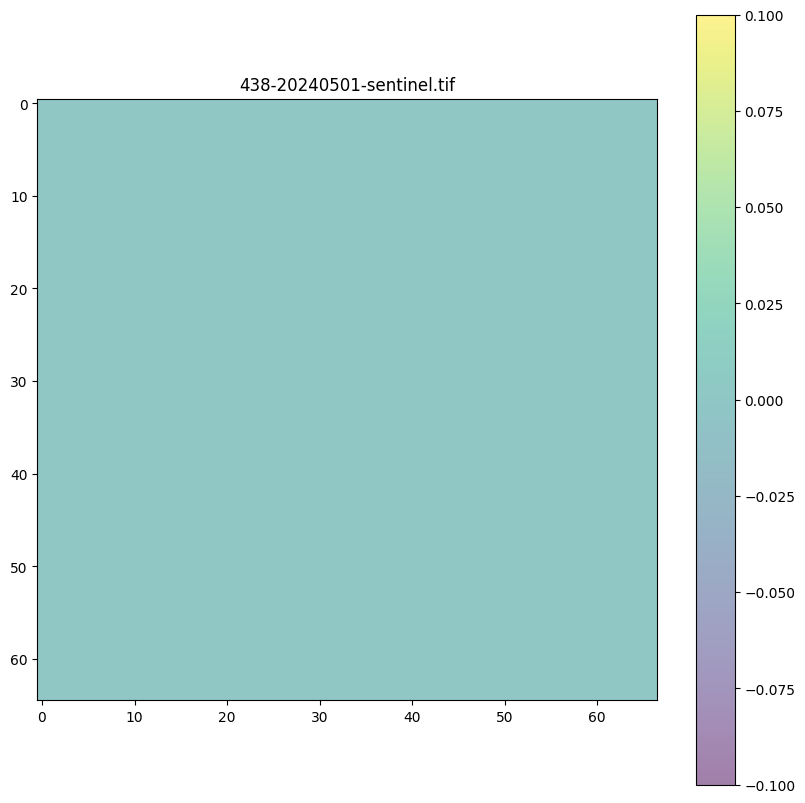

In [5]:
show_target_tif(r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\example_showcase\438-20240501-sentinel.tif')

#### 2.3 Perform all the file to generate the target

In [7]:
tif_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'
shapefile_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\J1V_Clip'
target_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target'

# caculate the time spend
import time

start_time = time.time()


for tif_file in os.listdir(tif_folder_path):
    if 'nicfi' in tif_file.lower():  # Check if the file name contains 'nicfi'
        tif_path = os.path.join(tif_folder_path, tif_file)
        shapefile_path = os.path.join(shapefile_folder_path, 'fire_nrt_J1VC2_536460_clip.shp')
        process_single_tif(tif_path, shapefile_path, target_folder_path, verbose=False)


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Start time: {start_time}")
print(f"End time: {end_time}")
print(f"Elapsed time: {elapsed_time:.2f} seconds")



Processing: 0-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\0-2024-03-target.tif

Processing: 0-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\0-2024-04-target.tif

Processing: 0-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\0-2024-05-target.tif

Processing: 1-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1-2024-03-target.tif

Processing: 1-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1-2024-04-target.tif

Processing: 1-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1-2024-05-target.tif

Processing: 10-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\10-2024-03-target.tif

Processing: 10-20

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1135-2024-03-target.tif

Processing: 1135-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1135-2024-04-target.tif

Processing: 1135-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1135-2024-05-target.tif

Processing: 1136-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1136-2024-03-target.tif

Processing: 1136-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1136-2024-04-target.tif

Processing: 1136-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1136-2024-05-target.tif

Processing: 1137-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1137-2024-03-target.tif

Processing: 1

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1216-2024-04-target.tif

Processing: 1216-2024-05-nicfi.tif

Created raster with 1535 non-zero pixels
Percentage of non-zero pixels: 19.97%

File name: 1216-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1216-2024-05-target.tif

Processing: 1217-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1217-2024-03-target.tif

Processing: 1217-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1217-2024-04-target.tif

Processing: 1217-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1217-2024-05-target.tif

Processing: 1218-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1218-2024-03-target.tif

Processing: 1218-2024-04-nicfi.tif
Saved tar

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1559 non-zero pixels
Percentage of non-zero pixels: 13.01%

File name: 1271-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1271-2024-05-target.tif

Processing: 1272-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1272-2024-03-target.tif

Processing: 1272-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1272-2024-04-target.tif

Processing: 1272-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1272-2024-05-target.tif

Processing: 1273-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1273-2024-03-target.tif

Processing: 1273-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1273-2024-04-target.tif

Processing: 1273-2024-05-nicfi.tif
Saved tar

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 879 non-zero pixels
Percentage of non-zero pixels: 21.46%

File name: 1359-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1359-2024-05-target.tif

Processing: 136-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\136-2024-03-target.tif

Processing: 136-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\136-2024-04-target.tif

Processing: 136-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\136-2024-05-target.tif

Processing: 1360-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1360-2024-03-target.tif

Processing: 1360-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1360-2024-04-target.tif

Processing: 1360-2024-05-nicfi.tif
Saved target ras

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1523 non-zero pixels
Percentage of non-zero pixels: 35.52%

File name: 1529-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1529-2024-03-target.tif

Processing: 1529-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1529-2024-04-target.tif

Processing: 1529-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1529-2024-05-target.tif

Processing: 153-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\153-2024-03-target.tif

Processing: 153-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\153-2024-04-target.tif

Processing: 153-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\153-2024-05-target.tif

Processing: 1530-2024-03-nicfi.tif
Saved target ra

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1354 non-zero pixels
Percentage of non-zero pixels: 4.53%

File name: 1585-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1585-2024-03-target.tif

Processing: 1585-2024-04-nicfi.tif

Created raster with 1558 non-zero pixels
Percentage of non-zero pixels: 5.21%

File name: 1585-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1585-2024-04-target.tif

Processing: 1585-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1585-2024-05-target.tif

Processing: 1586-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1586-2024-03-target.tif

Processing: 1586-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1586-2024-04-target.tif

Processing: 1586-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\G

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1614-2024-04-target.tif

Processing: 1614-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1614-2024-05-target.tif

Processing: 1615-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1615-2024-03-target.tif

Processing: 1615-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1615-2024-04-target.tif

Processing: 1615-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1615-2024-05-target.tif

Processing: 1618-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1618-2024-03-target.tif

Processing: 1618-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\1618-2024-04-target.tif

Processing: 1

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1453 non-zero pixels
Percentage of non-zero pixels: 13.18%

File name: 323-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\323-2024-04-target.tif

Processing: 323-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\323-2024-05-target.tif

Processing: 324-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\324-2024-03-target.tif

Processing: 324-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\324-2024-04-target.tif

Processing: 324-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\324-2024-05-target.tif

Processing: 325-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\325-2024-03-target.tif

Processing: 325-2024-04-nicfi.tif
Saved target raster to

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1556 non-zero pixels
Percentage of non-zero pixels: 3.43%

File name: 346-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\346-2024-04-target.tif

Processing: 346-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\346-2024-05-target.tif

Processing: 347-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\347-2024-03-target.tif

Processing: 347-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\347-2024-04-target.tif

Processing: 347-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\347-2024-05-target.tif

Processing: 348-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\348-2024-03-target.tif

Processing: 348-2024-04-nicfi.tif
Saved target raster to:

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\39-2024-03-target.tif

Processing: 39-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\39-2024-04-target.tif

Processing: 39-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\39-2024-05-target.tif

Processing: 392-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\392-2024-03-target.tif

Processing: 392-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\392-2024-04-target.tif

Processing: 392-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\392-2024-05-target.tif

Processing: 394-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\394-2024-03-target.tif

Processing: 394-2024-04-nicfi.t

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1425 non-zero pixels
Percentage of non-zero pixels: 34.25%

File name: 488-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\488-2024-05-target.tif

Processing: 489-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\489-2024-03-target.tif

Processing: 489-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\489-2024-04-target.tif

Processing: 489-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\489-2024-05-target.tif

Processing: 49-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\49-2024-03-target.tif

Processing: 49-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\49-2024-04-target.tif

Processing: 49-2024-05-nicfi.tif
Saved target raster to: G:\

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1999 non-zero pixels
Percentage of non-zero pixels: 48.80%

File name: 529-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\529-2024-04-target.tif

Processing: 529-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\529-2024-05-target.tif

Processing: 53-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\53-2024-03-target.tif

Processing: 53-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\53-2024-04-target.tif

Processing: 53-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\53-2024-05-target.tif

Processing: 530-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\530-2024-03-target.tif

Processing: 530-2024-04-nicfi.tif
Saved target raster to: G:\G

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\662-2024-03-target.tif

Processing: 662-2024-04-nicfi.tif

Created raster with 1553 non-zero pixels
Percentage of non-zero pixels: 3.12%

File name: 662-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\662-2024-04-target.tif

Processing: 662-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\662-2024-05-target.tif

Processing: 663-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\663-2024-03-target.tif

Processing: 663-2024-04-nicfi.tif


C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\663-2024-04-target.tif

Processing: 663-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\663-2024-05-target.tif

Processing: 664-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\664-2024-03-target.tif

Processing: 664-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\664-2024-04-target.tif

Processing: 664-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\664-2024-05-target.tif

Processing: 666-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\666-2024-03-target.tif

Processing: 666-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\666-2024-04-target.tif

Processing: 666-2024-05-ni

C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
C:\Users\lycaz\AppData\Local\Temp\ipykernel_34976\2974185684.py:100: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\750-2024-05-target.tif

Processing: 751-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\751-2024-03-target.tif

Processing: 751-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\751-2024-04-target.tif

Processing: 751-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\751-2024-05-target.tif

Processing: 752-2024-03-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\752-2024-03-target.tif

Processing: 752-2024-04-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\752-2024-04-target.tif

Processing: 752-2024-05-nicfi.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target\752-2024-05-target.tif

Processing: 753-2024-03-ni

#### 2.4 Statistics and show the none-zero result

Total count of the file: 3636


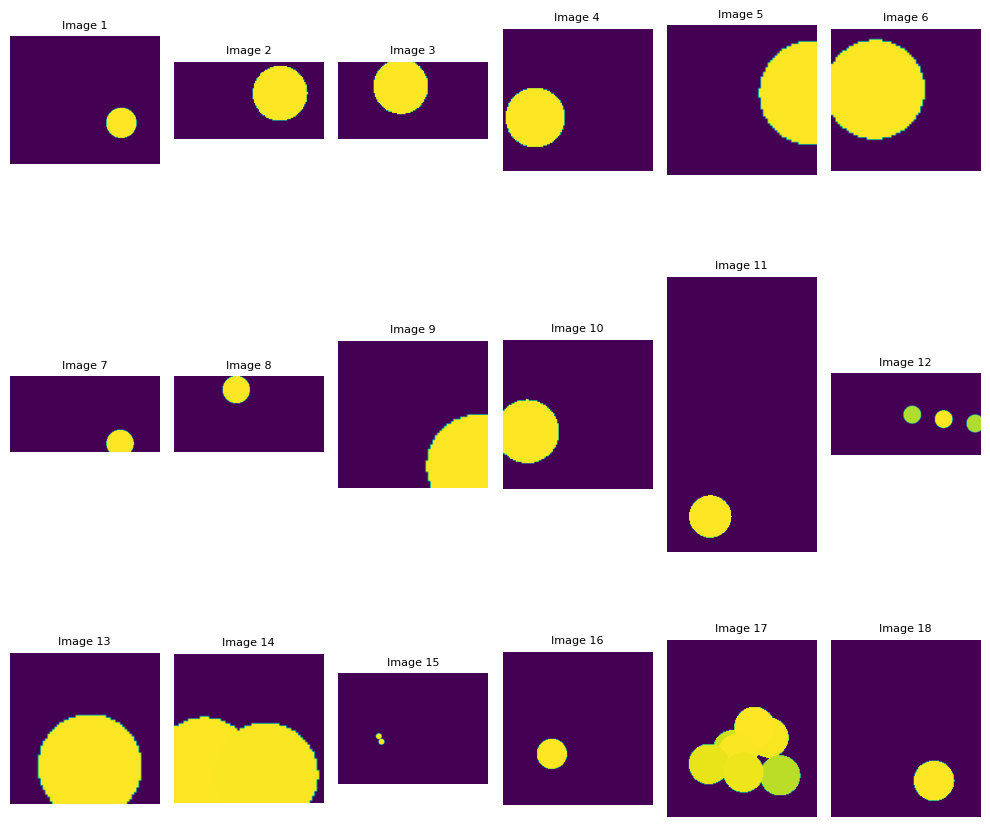

Percentage of file which has non-zero value: 0.50%


In [21]:
# statistics of the result
target_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target'

# check the total count of the file
total_count = 0
for file in os.listdir(target_folder_path):
    total_count += 1

print(f"Total count of the file: {total_count}")

# Initialize counters
nonzero_count = 0
total_count = len(os.listdir(target_folder_path))

# Collect valid files and count them
valid_files = []
for file in os.listdir(target_folder_path):
    file_path = os.path.join(target_folder_path, file)
    if np.count_nonzero(rasterio.open(file_path).read(1)) > 0:
        valid_files.append(file_path)
        nonzero_count += 1

# Plot all valid files in a grid
plot_tif_grid(valid_files, n_cols=6, figsize=(10, 10))
plt.show()

# Calculate and display the percentage
percentage = (nonzero_count / total_count) * 100
print(f"Percentage of file which has non-zero value: {percentage:.2f}%")


## 3. Generate the target tif file based on the points and the sentinel image
- Based on the points shape file 
- Buffer the points by 100 meter
- Rasterize the buffered points to the same size with the sentinel image
- Save the raster to the target folder

#### 3.1 Perform all the sentinel file to generate the target
- Only the first day of the month is processed

In [12]:
# still using the helper function in the Genereate tif file of the nicfi Block(already support the sentinel)

import os
import time

dev_sentinel_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_sentinel'
dev_target_s_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s'
shape_file_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\J1V_Clip\fire_nrt_J1VC2_536460_clip.shp'


start_time=time.time()
for tif_file in os.listdir(dev_sentinel_folder_path):
    tif_path = os.path.join(dev_sentinel_folder_path, tif_file)
    if '01-sentinel.tif' in tif_file: # only process the sentinel with the first day of the month
        process_single_tif(tif_path, shape_file_path, dev_target_s_path, verbose=False)


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Spend time: {elapsed_time:.2f} seconds")



Processing: 0-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\0-2024-03-target.tif

Processing: 0-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\0-2024-04-target.tif

Processing: 0-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\0-2024-05-target.tif

Processing: 1-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1-2024-03-target.tif

Processing: 1-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1-2024-04-target.tif

Processing: 1-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1-2024-05-target.tif

Processing: 10-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\10-2024-03-target.tif

Processing

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 390 non-zero pixels
Percentage of non-zero pixels: 3.81%

File name: 1134-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1134-2024-04-target.tif

Processing: 1134-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1134-2024-05-target.tif

Processing: 1135-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1135-2024-03-target.tif

Processing: 1135-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1135-2024-04-target.tif

Processing: 1135-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1135-2024-05-target.tif

Processing: 1136-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1136-2024-03-target.tif

Processing: 1136-20240401-sentinel.tif
S

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1217-2024-03-target.tif

Processing: 1217-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1217-2024-04-target.tif

Processing: 1217-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1217-2024-05-target.tif

Processing: 1218-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1218-2024-03-target.tif

Processing: 1218-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1218-2024-04-target.tif

Processing: 1218-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1218-2024-05-target.tif

Processing: 1219-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1219-2024-03-target.tif

Processing

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1272-2024-04-target.tif

Processing: 1272-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1272-2024-05-target.tif

Processing: 1273-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1273-2024-03-target.tif

Processing: 1273-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1273-2024-04-target.tif

Processing: 1273-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1273-2024-05-target.tif

Processing: 1274-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1274-2024-03-target.tif

Processing: 1274-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1274-2024-04-target.tif

Processing

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\136-2024-05-target.tif

Processing: 1360-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1360-2024-03-target.tif

Processing: 1360-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1360-2024-04-target.tif

Processing: 1360-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1360-2024-05-target.tif

Processing: 1362-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1362-2024-03-target.tif

Processing: 1362-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1362-2024-04-target.tif

Processing: 1362-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1362-2024-05-target.tif

Processing:

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 384 non-zero pixels
Percentage of non-zero pixels: 35.29%

File name: 1529-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1529-2024-03-target.tif

Processing: 1529-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1529-2024-04-target.tif

Processing: 1529-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1529-2024-05-target.tif

Processing: 153-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\153-2024-03-target.tif

Processing: 153-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\153-2024-04-target.tif

Processing: 153-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\153-2024-05-target.tif

Processing: 1530-20240301-sentinel.tif
Saved 

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1586-2024-03-target.tif

Processing: 1586-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1586-2024-04-target.tif

Processing: 1586-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1586-2024-05-target.tif

Processing: 1587-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1587-2024-03-target.tif

Processing: 1587-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1587-2024-04-target.tif

Processing: 1587-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1587-2024-05-target.tif

Processing: 1588-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1588-2024-03-target.tif

Processing

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\161-2024-05-target.tif

Processing: 1614-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1614-2024-03-target.tif

Processing: 1614-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1614-2024-04-target.tif

Processing: 1614-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1614-2024-05-target.tif

Processing: 1615-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1615-2024-03-target.tif

Processing: 1615-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1615-2024-04-target.tif

Processing: 1615-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\1615-2024-05-target.tif

Processing:

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 367 non-zero pixels
Percentage of non-zero pixels: 13.07%

File name: 323-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\323-2024-04-target.tif

Processing: 323-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\323-2024-05-target.tif

Processing: 324-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\324-2024-03-target.tif

Processing: 324-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\324-2024-04-target.tif

Processing: 324-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\324-2024-05-target.tif

Processing: 325-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\325-2024-03-target.tif

Processing: 325-20240401-sentinel.tif
Saved target 

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\346-2024-05-target.tif

Processing: 347-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\347-2024-03-target.tif

Processing: 347-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\347-2024-04-target.tif

Processing: 347-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\347-2024-05-target.tif

Processing: 348-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\348-2024-03-target.tif

Processing: 348-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\348-2024-04-target.tif

Processing: 348-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\348-2024-05-target.tif

Processing: 35-20240301

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 1114 non-zero pixels
Percentage of non-zero pixels: 5.70%

File name: 388-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\388-2024-04-target.tif

Processing: 388-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\388-2024-05-target.tif

Processing: 39-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\39-2024-03-target.tif

Processing: 39-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\39-2024-04-target.tif

Processing: 39-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\39-2024-05-target.tif

Processing: 392-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\392-2024-03-target.tif

Processing: 392-20240401-sentinel.tif
Saved target raster

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\489-2024-04-target.tif

Processing: 489-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\489-2024-05-target.tif

Processing: 49-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\49-2024-03-target.tif

Processing: 49-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\49-2024-04-target.tif

Processing: 49-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\49-2024-05-target.tif

Processing: 490-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\490-2024-03-target.tif

Processing: 490-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\490-2024-04-target.tif

Processing: 490-20240501-sent

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 502 non-zero pixels
Percentage of non-zero pixels: 49.02%

File name: 529-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\529-2024-04-target.tif

Processing: 529-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\529-2024-05-target.tif

Processing: 53-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\53-2024-03-target.tif

Processing: 53-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\53-2024-04-target.tif

Processing: 53-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\53-2024-05-target.tif

Processing: 530-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\530-2024-03-target.tif

Processing: 530-20240401-sentinel.tif
Saved target raster

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\661-2024-04-target.tif

Processing: 661-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\661-2024-05-target.tif

Processing: 662-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\662-2024-03-target.tif

Processing: 662-20240401-sentinel.tif

Created raster with 389 non-zero pixels
Percentage of non-zero pixels: 3.10%

File name: 662-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\662-2024-04-target.tif

Processing: 662-20240501-sentinel.tif


C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)


Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\662-2024-05-target.tif

Processing: 663-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\663-2024-03-target.tif

Processing: 663-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\663-2024-04-target.tif

Processing: 663-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\663-2024-05-target.tif

Processing: 664-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\664-2024-03-target.tif

Processing: 664-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\664-2024-04-target.tif

Processing: 664-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\664-2024-05-target.tif

Processing: 666-2024030

C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)
C:\Users\lycaz\AppData\Local\Temp\ipykernel_22168\1930579199.py:131: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points['geometry'] = buffered_points.geometry.buffer(buffer_radius)



Created raster with 387 non-zero pixels
Percentage of non-zero pixels: 4.71%

File name: 750-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\750-2024-04-target.tif

Processing: 750-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\750-2024-05-target.tif

Processing: 751-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\751-2024-03-target.tif

Processing: 751-20240401-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\751-2024-04-target.tif

Processing: 751-20240501-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\751-2024-05-target.tif

Processing: 752-20240301-sentinel.tif
Saved target raster to: G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s\752-2024-03-target.tif

Processing: 752-20240401-sentinel.tif
Saved target r

#### 3.2 Statistics and show the none-zero result of the sentinel target

Total count of the file: 3636


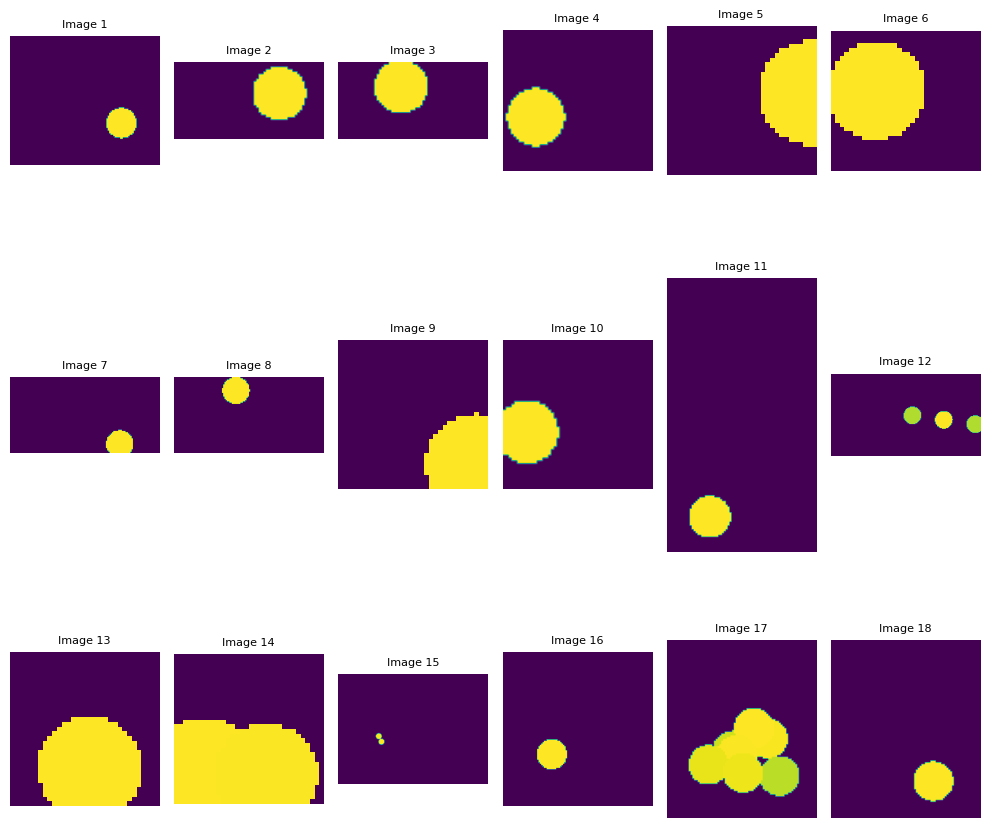

Percentage of file which has non-zero value: 0.50%


In [13]:
# statistics of the result
target_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s'

# check the total count of the file
total_count = 0
for file in os.listdir(target_folder_path):
    total_count += 1

print(f"Total count of the file: {total_count}")

# Initialize counters
nonzero_count = 0
total_count = len(os.listdir(target_folder_path))

# Collect valid files and count them
valid_files = []
for file in os.listdir(target_folder_path):
    file_path = os.path.join(target_folder_path, file)
    if np.count_nonzero(rasterio.open(file_path).read(1)) > 0:
        valid_files.append(file_path)
        nonzero_count += 1

# Plot all valid files in a grid
plot_tif_grid(valid_files, n_cols=6, figsize=(10, 10))
plt.show()

# Calculate and display the percentage
percentage = (nonzero_count / total_count) * 100
print(f"Percentage of file which has non-zero value: {percentage:.2f}%")

#### 3.3 Compare the nicfi and sentinel target size 

In [16]:
target_n_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test_target'
target_s_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_target_s'


# randomely select 10 tif files from the target_n_folder_path
import random
random_tif_files_n = random.sample(os.listdir(target_n_folder_path), 10)

# get the same file's name from the target_s_folder_path
random_tif_files_s = [file for file in os.listdir(target_s_folder_path) if file in random_tif_files_n]



# compared the tif's image's shape's size of the random_tif_files_n and random_tif_files_s
for file_name in random_tif_files_n:
    tif_n = file_name
    tif_s = file_name
    tif_n_path = os.path.join(target_n_folder_path, tif_n)
    tif_s_path = os.path.join(target_s_folder_path, tif_s)
    tif_n_array = rasterio.open(tif_n_path).read(1)
    tif_s_array = rasterio.open(tif_s_path).read(1)
    if tif_n_array.shape != tif_s_array.shape:
        print(f"{tif_n} and {tif_s} have different shapes: {tif_n_array.shape} vs {tif_s_array.shape}")
    else:
        print(f"{tif_n} and {tif_s} have the same shape: {tif_n_array.shape}")




1372-2024-04-target.tif and 1372-2024-04-target.tif have different shapes: (41, 41) vs (21, 21)
257-2024-03-target.tif and 257-2024-03-target.tif have different shapes: (64, 66) vs (33, 33)
1451-2024-03-target.tif and 1451-2024-03-target.tif have different shapes: (41, 41) vs (21, 21)
261-2024-05-target.tif and 261-2024-05-target.tif have different shapes: (41, 42) vs (21, 21)
1210-2024-04-target.tif and 1210-2024-04-target.tif have different shapes: (64, 64) vs (32, 32)
405-2024-05-target.tif and 405-2024-05-target.tif have different shapes: (65, 64) vs (33, 32)
721-2024-04-target.tif and 721-2024-04-target.tif have different shapes: (42, 42) vs (22, 22)
1056-2024-04-target.tif and 1056-2024-04-target.tif have different shapes: (41, 42) vs (21, 22)
539-2024-04-target.tif and 539-2024-04-target.tif have different shapes: (64, 65) vs (33, 33)
276-2024-03-target.tif and 276-2024-03-target.tif have different shapes: (41, 41) vs (21, 21)


## 4. Ognize the tif files 

In [2]:
# seperate the nicfi and sentinel tif files 
import os
import shutil

tif_folder_path= r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_test'
nicfi_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_nicfi'
sentinel_folder_path = r'G:\GithubProject\GoogleEarthEngineTask\Tif_ML\dev_sentinel'

for tif_file in os.listdir(tif_folder_path):
    if 'nicfi' in tif_file.lower():  # Check if the file name contains 'nicfi'
        tif_path = os.path.join(tif_folder_path, tif_file)
        shutil.move(tif_path, nicfi_folder_path)
    elif 'sentinel' in tif_file.lower():  # Check if the file name contains 'sentinel'
        tif_path = os.path.join(tif_folder_path, tif_file)
        shutil.move(tif_path, sentinel_folder_path)

# check the total count of the file tif_folder_path
total_count = 0
for file in os.listdir(tif_folder_path):
    total_count += 1

print(f"Total count of the file tif_folder_path: {total_count}")

# check the total count of the file nicfi_folder_path
total_count = 0
for file in os.listdir(nicfi_folder_path):
    total_count += 1

print(f"Total count of the file nicfi_folder_path: {total_count}")


# check the total count of the file sentinel_folder_path
total_count = 0
for file in os.listdir(sentinel_folder_path):
    total_count += 1

print(f"Total count of the file sentinel_folder_path: {total_count}")


Total count of the file tif_folder_path: 0
Total count of the file nicfi_folder_path: 3636
Total count of the file sentinel_folder_path: 10908
